# Principal Component Analysis
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Principal Component Analysis** and apply it to **restore rotated CAPTCHA**
- play with **Eigenface** by applying PCA on a real world face dataset
- use PCA to do **dimension reduction**. Evaluate the loss of information qualitatively and quantitatively

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [140]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Now let's hack the rotated CAPTCHA!

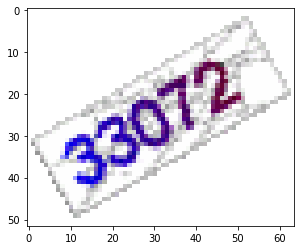

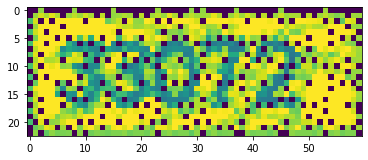

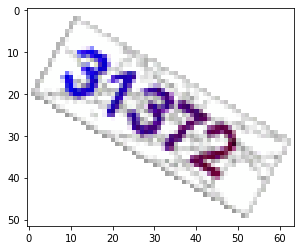

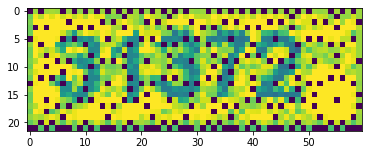

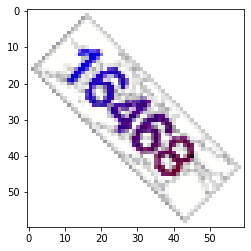

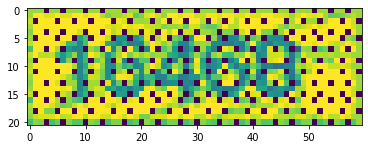

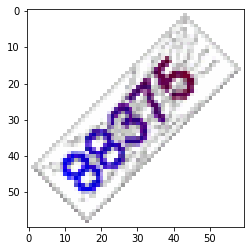

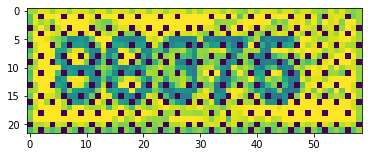

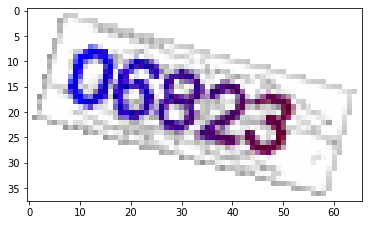

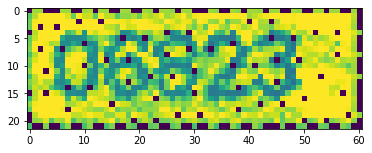

In [144]:
from hack_pca import hack_pca

# Hack different images yourself
for i in [1,2,3,4,5]:
    img = hack_pca(str(i)+'.gif')
    img=np.transpose(img,(1,0))
    plt.imshow(img[::-1,:])
    plt.show()

## Apply PCA on face image

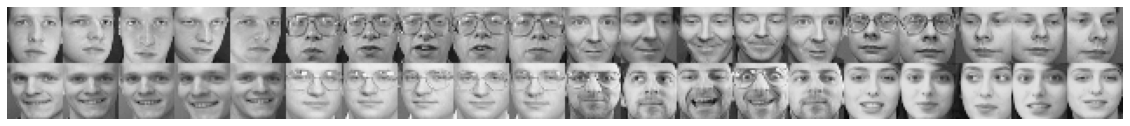

In [112]:
# load data
ORL_data = sio.loadmat('ORL_data.mat')
fea_Train = ORL_data['fea_Train']
gnd_Train = ORL_data['gnd_Train'].reshape(-1)
fea_Test = ORL_data['fea_Test']
gnd_Test = ORL_data['gnd_Test'].reshape(-1)
# YOUR CODE HERE

# 1. Feature preprocessing
# begin answer
# end answer
from show_face import show_face
show_face(fea_Train)

In [113]:
fea_Train.shape,gnd_Train.shape,fea_Test.shape,gnd_Test.shape

((200, 1024), (200,), (200, 1024), (200,))

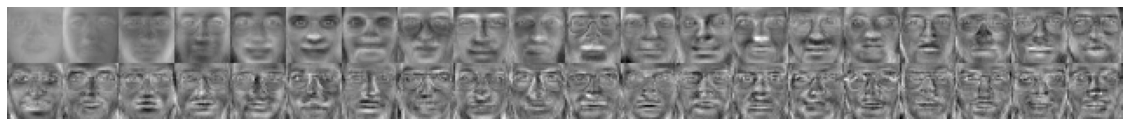

In [120]:
# 2. Run PCA
# begin answer
from pca import PCA
eigvector,eigvalue=PCA(fea_Train)
# end answer
# 3. Visualize eigenface
# begin answer
show_face(eigvector.T)
# end answer

PCs=8,error rate = 0.495
PCs=16,error rate = 0.455
PCs=32,error rate = 0.38
PCs=128,error rate = 0.37


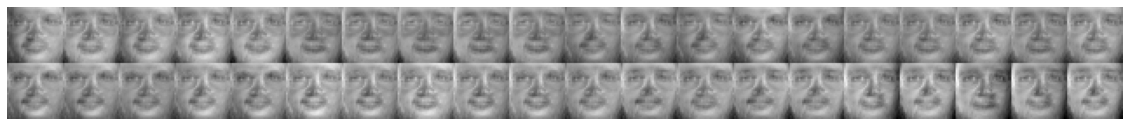

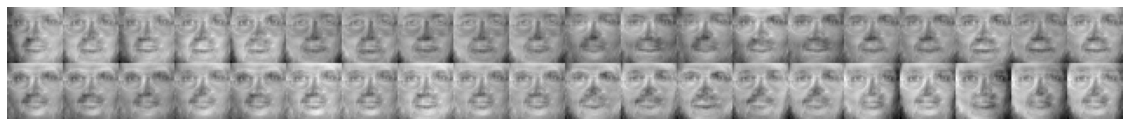

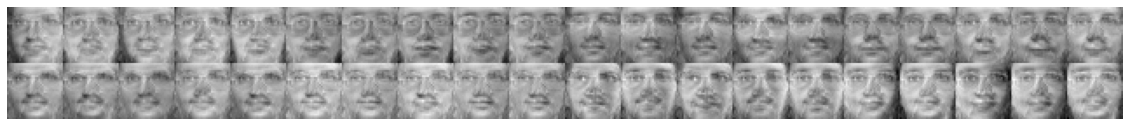

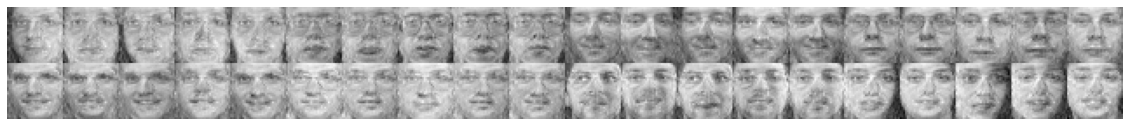

In [122]:
# 4. Project data on to low dimensional space
# begin answer
from knn import *
PCs=[8,16,32,128]
for k in PCs:
    new_train=fea_Train.dot(eigvector[:,:k])
    new_test=fea_Test.dot(eigvector[:,:k])
# end answer

# 5. Run KNN in low dimensional space
# begin answer
    pred_y=knn(new_test, new_train, gnd_Train, 5)
    error=np.sum(pred_y!=gnd_Test)/gnd_Test.shape[0]
    print(f"PCs={k},error rate = {error}")

# end answer
# 6. Recover face images form low dimensional space, visualize them
# begin answer
    show_face(new_test.dot(eigvector[:,:k].T))
# end answer  

## You are encouraged to apply LDA on this dataset!

In [123]:
from LDA import LDA
# Your code here
# begin answer
eigvector,eigvalue=LDA(fea_Train, gnd_Train)
PCs=[8,16,32,128]
for k in PCs:
    new_train=fea_Train.dot(eigvector[:,:k])
    new_test=fea_Test.dot(eigvector[:,:k])
    pred_y=knn(new_test, new_train, gnd_Train, 6)
    error=np.sum(pred_y!=gnd_Test)/gnd_Test.shape[0]
    print(f"PCs={k},error rate = {error}")
# end answer

PCs=8,error rate = 0.105
PCs=16,error rate = 0.075
PCs=32,error rate = 0.055
PCs=128,error rate = 0.05
